- Lab 9 Hypothesis Testing

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

Your company has recently launched a software 'X' but users are complaining of slow network connection in some areas. Some tests suggests (RTT) round trip time (under some specific test condition) currently to be around 1000ms. Your company decides to outsource the networking component from a specialized vendor. A sample of values of RTT for the current software is provided in the attached file “rtt_current.txt”. Now, the company that improved upon your existing software component claims that it has greatly improved networking and the RTT has decreased from before by more than 800ms. A sample of RRTs of the same software while using the supposedly improved networking component is given in the attached file “rtt_new.txt”. You are required to test that claim on behalf of your company (the one that is paying for outsourced component). Assume you don't know the nature of distribution of the population and use appropriate test statistic (z-score or t-score) accordingly (with description on why you chose it).

1. Formulate the hypothesis; what is null and what is alternate and why.

Null Hypothesis (H₀): The mean Round Trip Time (RTT) with the new networking component is not significantly different from the mean RTT of the original software minus 800 ms.
H₀: μ_new = μ_current - 800

Alternative Hypothesis (H₁): The mean Round Trip Time (RTT) with the new networking component is significantly less than the mean RTT of the original software minus 800 ms.
H₁: μ_new < μ_current - 800

We assume no significant difference unless proven otherwise. The claim is that the new component has reduced RTT by more than 800 ms, so we compare the new mean RTT to the old mean RTT minus 800 ms. The alternative hypothesis reflects the company's belief that the new networking component has indeed improved the situation by reducing the RTT by more than 800 ms.

2. Plot where this difference of mean of RRTs (before and after case) would lie in the the sampling distribution.

In [77]:
def txt_to_np(file_path):
    data = pd.read_csv(file_path, header=None)
    # data.replace('', np.nan, inplace=True) 
    # data.dropna(inplace=True)
    data = data.to_numpy()  
    data = data[~np.isnan(data)]
    data = data.reshape(1, -1)
    print(data.shape)
    return data 

In [ ]:
rtt_current_orginal = txt_to_np('rtt_current.txt')
rtt_new_orginal = txt_to_np('rtt_new.txt')
roll_number = 48
confidence_level = (75 + roll_number / 5) / 100
alpha = 1 - confidence_level
z_score = norm.ppf(1 - alpha)
print(f'z_score: {z_score}')

(1, 500)
(1, 200)
z_score: 1.0194276182343704


In [ ]:
n_samples = 1000  
mu_current = np.mean(rtt_current_orginal)  
sigma_current = np.std(rtt_current_orginal)) 
mu_new = np.mean(rtt_new_orginal)    
sigma_new = np.std(rtt_new_orginal)  

In [88]:
rtt_current = np.random.normal(mu_current, sigma_current, n_samples)
rtt_new = np.random.normal(mu_new, sigma_new, n_samples)

In [89]:
mean_current = np.mean(rtt_current)
mean_new = np.mean(rtt_new)

difference_of_means = mean_new - mean_current
se_difference = np.sqrt((sigma_current**2 / n_samples) + (sigma_new**2 / n_samples))
confidence_interval_one_tailed = (difference_of_means - z_score * se_difference, np.inf)  

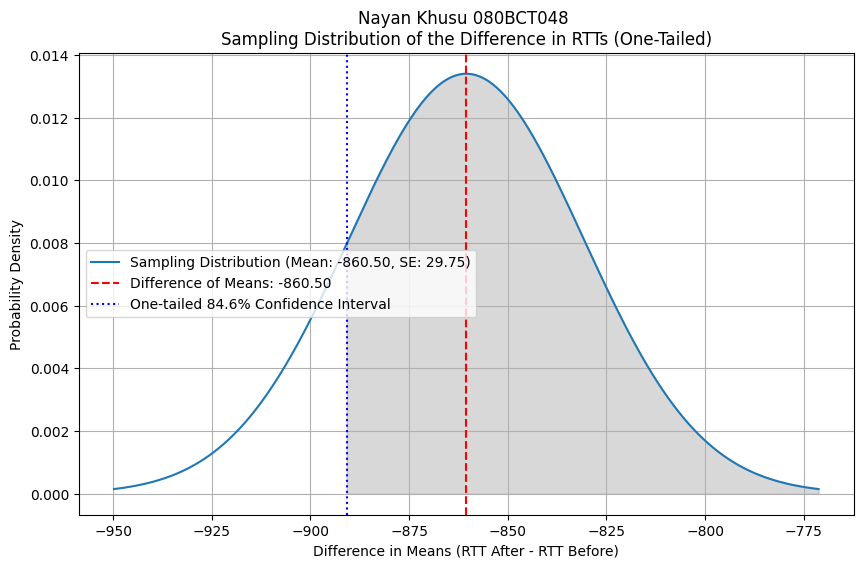

In [90]:
plt.figure(figsize=(10, 6))
x = np.linspace(difference_of_means - 3 * se_difference, 
                difference_of_means + 3 * se_difference, 1000)
y = norm.pdf(x, loc=difference_of_means, scale=se_difference)

plt.plot(x, y, label=f"Sampling Distribution (Mean: {difference_of_means:.2f}, SE: {se_difference:.2f})")
plt.fill_between(x, y, where=(x >= confidence_interval_one_tailed[0]), color='gray', alpha=0.3)

plt.axvline(difference_of_means, color='red', linestyle='--', label=f"Difference of Means: {difference_of_means:.2f}")
plt.axvline(confidence_interval_one_tailed[0], color='blue', linestyle=':', label=f"One-tailed 84.6% Confidence Interval")

plt.title("Nayan Khusu 080BCT048 \nSampling Distribution of the Difference in RTTs (One-Tailed)")
plt.xlabel("Difference in Means (RTT After - RTT Before)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

3. Find the p-value and perform the test at (75 + your_roll_number / 5)% confidence level. 
We normally calculate p-value and perform test between H0:μ=C and Ha:μ>C even when the actual hypotheses are H0:μ≤C and Ha:μ>C

In [96]:
C = 800
p_value = 1 - norm.cdf(z_score)
print(f'z_score: {z_score}, p_value: {p_value}')

z_score: 1.0194276182343704, p_value: 0.15400000000000014


In [97]:
if p_value < alpha:
    print("Reject H₀")
else:
    print("Fail to reject H₀")

Fail to reject H₀


4. Lets say your actual contradicting hypotheses in above question are H0:μ1−μ2≤C and Ha:μ1−μ2>C , then find p-value and perform test betweeen H0:μ1−μ2=C−δc and Ha:μ1−μ2>C ; increase δc from 0 to C in fixed interval of ((100 +your_roll_number) / 5). If your actual contradicting hypotheses are H0:μ1−μ2≥C and Ha:μ1−μ2<C , then find p-value and perform test betweeen H0:μ1−μ2=C+δc and Ha:μ1−μ2<C ; increase δc from 0 to C in fixed interval of ((100 +your_roll_number) / 5). Comment on what you observe (can you now see why we took H0:μ1−μ2=C and Ha:μ1−μ2 [>or<] C even when our actual hypothesis was H0:μ1−μ2 [≤or≥] C and Ha:μ1−μ2 [>or<] C ). {Hint: Test of difference between two population mean. You can use scipy.stats for cdf}

In [98]:
interval = (100 + roll_number) / 5
p_values_array = []

In [100]:
for delta_c in np.arange(0, C + interval, interval):
    if C - delta_c >= 0:
        z_score = (difference_of_means - (C - delta_c)) / se_difference
        p_value = norm.sf(z_score)
    else:
        z_score = (difference_of_means - (C + delta_c)) / se_difference
        p_value = norm.cdf(z_score)  

    p_values_array.append(p_value)

In [105]:
for delta_c, p_value in zip(np.arange(0, C + interval, interval), p_values_array):
    print(f"δc: {delta_c:.2f}\t P-value: {p_value}")

δc: 0.00	 P-value: 1.0
δc: 29.60	 P-value: 1.0
δc: 59.20	 P-value: 1.0
δc: 88.80	 P-value: 1.0
δc: 118.40	 P-value: 1.0
δc: 148.00	 P-value: 1.0
δc: 177.60	 P-value: 1.0
δc: 207.20	 P-value: 1.0
δc: 236.80	 P-value: 1.0
δc: 266.40	 P-value: 1.0
δc: 296.00	 P-value: 1.0
δc: 325.60	 P-value: 1.0
δc: 355.20	 P-value: 1.0
δc: 384.80	 P-value: 1.0
δc: 414.40	 P-value: 1.0
δc: 444.00	 P-value: 1.0
δc: 473.60	 P-value: 1.0
δc: 503.20	 P-value: 1.0
δc: 532.80	 P-value: 1.0
δc: 562.40	 P-value: 1.0
δc: 592.00	 P-value: 1.0
δc: 621.60	 P-value: 1.0
δc: 651.20	 P-value: 1.0
δc: 680.80	 P-value: 1.0
δc: 710.40	 P-value: 1.0
δc: 740.00	 P-value: 1.0
δc: 769.60	 P-value: 1.0
δc: 799.20	 P-value: 1.0
δc: 828.80	 P-value: 0.0
